In [10]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import yaml

%matplotlib inline

In [11]:
#values for csv importing
csv_opts = {'sep': '|',
           'quotechar': '"',
           #'compression': 'gzip',
           'encoding': 'utf-8'}

In [12]:
with open('../hand/arrest_dtypes.yaml', 'r') as yamlfile:
        arrest_dtypes = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [13]:
#reading in CSV file
arrests = pd.read_csv('../input/arrests.csv', **csv_opts, dtype=arrest_dtypes)

In [14]:
#putting event date into m/d/y format
arrests['apprehension_date'] = pd.to_datetime(
    arrests['apprehension_date'], format='%m/%d/%Y')

# Overview

The FOIA data provided by ICE appears to include complete arrests data for fiscal years 2016-2019 with the exception of the last month of FY 2018. According to ICE's FY2019 reporting, ERO conducted 143,470 arrests in FY2017 and 158,581 arrests in FY2018, which matches the data provided to us (https://www.ice.gov/sites/default/files/documents/Document/2019/eroReportFY2019.pdf). This same report says that in FY2019 ICE made 143,099 arrest, but our data only reports 131,904, which suggests that the difference is from arrests made in September of 2019. Based on ICE's local statistics, these arrests include both criminal and non-criminal arrests (https://www.ice.gov/sites/default/files/documents/Document/2017/localStats2017b.pdf).

In [71]:
# overview of variables in arrests dataset
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544059 entries, 0 to 544058
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   aor                     540251 non-null  category      
 1   apprehension_date       544059 non-null  datetime64[ns]
 2   apprehension_method     544059 non-null  category      
 3   apprehension_landmark   529216 non-null  category      
 4   operation               117368 non-null  category      
 5   processing_disposition  543865 non-null  category      
 6   citizenship             544059 non-null  category      
 7   gender                  544059 non-null  category      
 8   id                      544059 non-null  int64         
 9   year                    544059 non-null  object        
 10  month                   544059 non-null  object        
 11  non-specific            544059 non-null  int64         
dtypes: category(7), datetime64[ns]

In [7]:
# column heads of arrests dataset
arrests.head()

,aor,apprehension_date,apprehension_method,apprehension_landmark,operation,processing_disposition,citizenship,gender,id
0,SPM,2015-10-01,Probation and Parole,OMAHA NE NON-FUGITIVE ARREST,NaN,REINSTATEMENT OF DEPORT ORDER I-871,MEXICO,Male,0
1,CHI,2015-10-01,Non-Custodial Arrest,"CHI GENERAL AREA, NON-SPECIFIC",NaN,Bag and Baggage,GUATEMALA,Male,1
2,LOS,2015-10-01,CAP State Incarceration,CALIFORNIA MENS COLONY WEST,NaN,Other,LAOS,Male,2
3,HOU,2015-10-01,CAP State Incarceration,"TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO",NaN,REINSTATEMENT OF DEPORT ORDER I-871,MEXICO,Male,3
4,SNA,2015-10-01,CAP Federal Incarceration,HOUSTON ERO CONTRACT DET FACILITY,NaN,Other,MEXICO,Male,4


In [14]:
# adding year and month columns
arrests["year"] = arrests["apprehension_date"].dt.strftime('%Y')
arrests["month"] = arrests["apprehension_date"].dt.strftime('%m')

In [15]:
# counting arrests by fiscal year
arrests.set_index('apprehension_date').groupby(
    pd.Grouper(freq='AS-OCT'), dropna=False)['id'].count()

apprehension_date
2015-10-01    110104
2016-10-01    143470
2017-10-01    158581
2018-10-01    131904
Freq: AS-OCT, Name: id, dtype: int64

In [15]:
# counting arrests by month
arrests.set_index('apprehension_date').groupby(
    pd.Grouper(freq='MS'), dropna=False)['id'].count()

apprehension_date
2015-10-01    10242
2015-11-01     8544
2015-12-01     8778
2016-01-01     8046
2016-02-01     8756
2016-03-01     9669
2016-04-01     9457
2016-05-01     9652
2016-06-01     9103
2016-07-01     8436
2016-08-01    10115
2016-09-01     9306
2016-10-01     9397
2016-11-01     9015
2016-12-01     8998
2017-01-01     9575
2017-02-01    11554
2017-03-01    14084
2017-04-01    12372
2017-05-01    13527
2017-06-01    13972
2017-07-01    13567
2017-08-01    14364
2017-09-01    13045
2017-10-01    14006
2017-11-01    13177
2017-12-01    12307
2018-01-01    13167
2018-02-01    13236
2018-03-01    13737
2018-04-01    13324
2018-05-01    14280
2018-06-01    13315
2018-07-01    12578
2018-08-01    13718
2018-09-01    11736
2018-10-01    12378
2018-11-01    11693
2018-12-01    11216
2019-01-01    12491
2019-02-01    12381
2019-03-01    12136
2019-04-01    12151
2019-05-01    13073
2019-06-01    11208
2019-07-01    11714
2019-08-01    11459
2019-09-01        4
Freq: MS, Name: id, dt

## CBP Data

Customs and Border Protection (CBP) is a significant source of detentions in ICE ERO facilities that does not appear to be included in our datasets on arrests. For example, in FY 2021 ICE reported 21,566 that among 135 of its facilities, 79% of which were detained by CBP (https://www.ice.gov/detain/detention-management). In another report, ICE ERO reported a total detention population in FY2019 of 50,922, 63% of which was due to CBP (https://www.ice.gov/sites/default/files/documents/Document/2019/eroReportFY2019.pdf). This reported decline in detention may be due to the type of facility being measured (inclusion or exclusion of contract facilities and jails/prison) as well as reported declines in detention due to COVID-19 social distancing (https://www.ice.gov/features/ERO-2020). This decline in detention due to COVID-19 is the result of declining intakes from CBP and a possible increase in the number of people on ICE ERO’s non-detained national docket.

Additionally, detentions are not only  due to arrests. Rather, initial detentions (excluding transfers between facilities) may be better measured through "book-ins." Book-ins appear to be driven in large part due to CBP apprehensions. According to CBP data,  "Apprehensions refers to the physical control or temporary detainment of a person who is not lawfully in the U.S. which may or may not result in an arrest." Apprehensions are conducted by both Customs and Border Patrol and the Office of Field Operations, and monthly apprehension data is publicly available for both these agencies but only at the geographic level of "northern" or "southern" border (https://www.cbp.gov/newsroom/stats/cbp-enforcement-statistics/title-8-and-title-42-statistics). More detailed data for "Encounters" is available at the state level by FY, but Encounters also includes data on Title 8 Inadmissables, who may or may not make their way into ERO detention centers (https://www.cbp.gov/newsroom/stats/nationwide-encounters). CBP also maintains its own temporary detention centers (including stations and central processing centers), but with a capacity limited to 5,000 and some monthly data on transfers to ICE facilities (https://www.cbp.gov/newsroom/stats/custody-and-transfer-statistics).

Unfortunately, BPS only provides limited time series data going back a decade or more. However, five public datasets are possible as useful controls:
>"Total Illegal Alien Apprehensions By Month and Sector FY2000-2020": https://www.cbp.gov/sites/default/files/assets/documents/2021-Aug/U.S.%20Border%20Patrol%20Monthly%20Encounters%20%28FY%202000%20-%20FY%202020%29%20%28508%29.pdf

>"Annual apprehensions by sector and citizenship FY2007-2020": https://www.cbp.gov/sites/default/files/assets/documents/2021-Aug/USBORD~3.PDF

>"Total Unaccompanied Alien Children (0-17 Years Old) Apprehensions By Sector and Month FY2010-2019": https://www.cbp.gov/sites/default/files/assets/documents/2020-Jan/U.S.%20Border%20Patrol%20Total%20Monthly%20UAC%20Apprehensions%20by%20Sector%20%28FY%202010%20-%20FY%202019%29_0.pdf

>"Total Family Unit* Apprehensions By Sector and Month FY2013-2019": https://www.cbp.gov/sites/default/files/assets/documents/2020-Jan/U.S.%20Border%20Patrol%20Total%20Monthly%20Family%20Unit%20Apprehensions%20by%20Sector%20%28FY%202013%20-%20FY%202019%29_1.pdf

>"BPS Staffing by sector FY1992-2020": https://www.cbp.gov/sites/default/files/assets/documents/2021-Aug/U.S.%20Border%20Patrol%20Fiscal%20Year%20Staffing%20Statistics%20%28FY%201992%20-%20FY%202020%29%20%28508%29.pdf

Additionally, the Office of Immigration Statistics puts out annual data tables between FY2004-2019 that includes apprehensions and removals by agency and sector: https://www.dhs.gov/immigration-statistics/enforcement-actions

# Null values

Less than 1% of all FOIA data provided includes null values, with the exception of 'Apprehension Landmark' and 'Operation.' The former has just under 3% null values, and the latter is redacted so does not include useful data for analysis.  

In [16]:
# creating table for null values of arrests
# formatting added for commas and percent sign
null_table = [['Variable', 'NaN', '% Nan'], 
              ['AOR', 
               "{:,}".format(sum(pd.isnull(arrests.aor))), 
               str(round(sum(pd.isnull(arrests.aor)) / len(arrests) * 100, 2)) +'%'], 
              ['Apprehension Date', 
               "{:,}".format(sum(pd.isnull(arrests.apprehension_date))), 
               str(round(sum(pd.isnull(arrests.apprehension_date)) / len(arrests) * 100, 2)) +'%'], 
              ['Apprehension Method', 
               "{:,}".format(sum(pd.isnull(arrests.apprehension_method))), 
               str(round(sum(pd.isnull(arrests.apprehension_method)) / len(arrests) * 100, 2)) +'%'], 
              ['Operation', 
               "{:,}".format(sum(pd.isnull(arrests.operation))), 
               str(round(sum(pd.isnull(arrests.operation)) / len(arrests) * 100, 2)) +'%'],
              ['Apprehension Landmark', 
               "{:,}".format(sum(pd.isnull(arrests.apprehension_landmark))), 
               str(round(sum(pd.isnull(arrests.apprehension_landmark)) / len(arrests) * 100, 2)) +'%'], 
              ['Processing Disposition', 
               "{:,}".format(sum(pd.isnull(arrests.processing_disposition))), 
               str(round(sum(pd.isnull(arrests.processing_disposition)) / len(arrests) * 100, 2)) +'%'], 
              ['Citizenship', 
               "{:,}".format(sum(pd.isnull(arrests.citizenship))), 
               str(round(sum(pd.isnull(arrests.citizenship)) / len(arrests) * 100, 2)) +'%'],
              ['Gender', 
               "{:,}".format(sum(pd.isnull(arrests.gender))), 
               str(round(sum(pd.isnull(arrests.gender)) / len(arrests) * 100, 2)) +'%']
             ]

#print header and table of null values
print('')
print('Null values for Arrests data (total = 544,059)')
print(tabulate(null_table, headers='firstrow', 
               tablefmt='fancy_grid', stralign='center', numalign='center'))


Null values for Arrests data (total = 544,059)
╒════════════════════════╤═════════╤═════════╕
│        Variable        │   NaN   │  % Nan  │
╞════════════════════════╪═════════╪═════════╡
│          AOR           │  3,808  │  0.7%   │
├────────────────────────┼─────────┼─────────┤
│   Apprehension Date    │    0    │  0.0%   │
├────────────────────────┼─────────┼─────────┤
│  Apprehension Method   │    0    │  0.0%   │
├────────────────────────┼─────────┼─────────┤
│       Operation        │ 426,691 │ 78.43%  │
├────────────────────────┼─────────┼─────────┤
│ Apprehension Landmark  │ 14,843  │  2.73%  │
├────────────────────────┼─────────┼─────────┤
│ Processing Disposition │   194   │  0.04%  │
├────────────────────────┼─────────┼─────────┤
│      Citizenship       │    0    │  0.0%   │
├────────────────────────┼─────────┼─────────┤
│         Gender         │    0    │  0.0%   │
╘════════════════════════╧═════════╧═════════╛


# Apprehension Methods

Arrests across the 24 AORs fluctuate over time (excluding NaN and HQ). Generally, they increase before 2017 and then slightly decrease afterwards. According to ICE reporting, this decrease is due to reallocating staffing resources to border enforcement, indicating that this data does not include arrests by Customs and Border Protection (https://www.ice.gov/sites/default/files/documents/Document/2019/eroReportFY2019.pdf).

The largest AORs by arrest volume are those along the southern border, with Chicago being the biggest exception. Looking at apprehension methods over time across all AORs supports this conclusion, with the largest arrests due to interior enforcement and methods such as 'Patrol Border' accounting for just 17 arrests in FY2018.

To explore individual AORs over time by arrest method, please see the interactive chart at the bottom of this section.

apprehension_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
aor,,,,
DAL,"9,634","16,520","17,644","15,571"
ATL,"8,866","13,551","15,189","12,268"
SNA,"8,425","8,510","10,749","10,968"
HOU,"12,896","13,565","14,333","10,761"
NOL,"5,174","7,968","10,270","9,075"
MIA,"3,524","6,192","8,474","8,695"
CHI,"7,055","8,604","9,241","7,769"
LOS,"7,651","8,419","7,854","6,144"
PHO,"5,370","6,457","7,162","5,420"


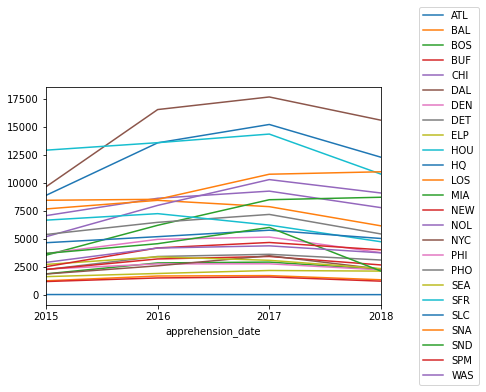

In [42]:
# creating subset of arrests by AOR over time
arrests_by_fy = arrests[["aor", "apprehension_date", "id"]]
arrests_by_fy = arrests_by_fy.groupby(
    ["aor", "apprehension_date"], as_index=False, dropna=False)['id'].count()

# pivot table so dates are rows and AORs are columns
arrests_by_fy = arrests_by_fy.pivot(
    index='apprehension_date', columns='aor', values='id')

# grouping by fiscal year
arrests_by_fy = arrests_by_fy.groupby(
    pd.Grouper(freq='AS-OCT'), dropna=False).sum()

# create plot of arrests over time in each AOR
arrests_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

# create transposed table of arrests over time in each AOR
arrests_by_fy.T.sort_values(
    by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

apprehension_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
apprehension_method,,,,
CAP Local Incarceration,"36,514","56,887","65,374","55,177"
CAP Federal Incarceration,"23,440","22,011","22,026","17,058"
Non-Custodial Arrest,"11,329","16,659","17,639","15,789"
Located,"14,385","18,825","19,349","14,700"
CAP State Incarceration,"10,499","10,282","10,897","9,560"
287(g) Program,"3,149","7,164","10,338","8,361"
ERO Reprocessed Arrest,"3,705","3,367","5,732","4,999"
Probation and Parole,"4,634","4,582","3,548","2,109"
Patrol Border,67,157,76,"1,374"


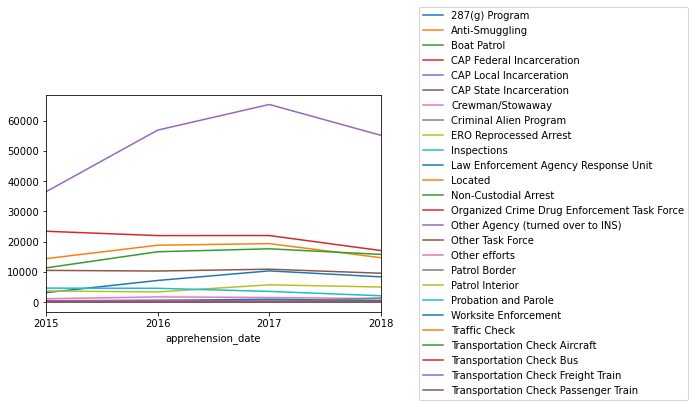

In [133]:
# create subset of the number of each arrest method over time
arrests_by_method = arrests[["apprehension_date", "apprehension_method", "id"]]
arrests_by_method = arrests_by_method.groupby(["apprehension_method", "apprehension_date"],
                                              as_index=False, dropna=False)['id'].count()

# pivot table so dates are in rows and arrest method is in columns
arrests_by_method = arrests_by_method.pivot(
    index='apprehension_date', columns='apprehension_method', values='id')

# group by fiscal year
arrests_by_method = arrests_by_method.groupby(pd.Grouper(freq='AS-OCT')).sum()

# create plot of arrest methods over time
arrests_by_method.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

# create table of arrests methods over fiscal year
arrests_by_method.transpose().sort_values(
    by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

## Apprehension Methods within AOR

In [17]:
# create subset of arrest method over time in each AOR
arrests_by_method = arrests[["aor", "apprehension_date", "apprehension_method", "id"]]
arrests_by_method = arrests_by_method.groupby(
    ["aor", "apprehension_date", "apprehension_method"], 
    as_index=False, dropna=False)['id'].count()

#create set of unique AORs, excluding NAN
foo = set(arrests['aor'])
foo.remove(np.nan)

# function that returns the arrests methods by fiscal year for a given AOR
def aor_arrest_methods(place):
    # subset arrest methods by given AOR
    arrests_by_method_aor = arrests_by_method.loc[
        arrests_by_method["aor"] == place]

    # pivot table so date is in rows and method in columns
    arrests_by_method_aor = arrests_by_method_aor.pivot(
        index='apprehension_date', columns='apprehension_method', values='id')

    # group by fiscal year
    arrests_by_method_aor = arrests_by_method_aor.groupby(
        pd.Grouper(freq='AS-OCT'), dropna=False).sum()

    #transpose table
    arrests_by_method_aor = arrests_by_method_aor.transpose()

    #sort values descending by most recent fiscal year
    arrests_by_method_aor = arrests_by_method_aor.sort_values(
        by=[arrests_by_method_aor.columns[3]], ascending=False).style.format("{:,.0f}")

    #return table of sorted arrest methods for given AOR
    return display(arrests_by_method_aor)

In [19]:
# create widget for drop down menu of AORs
widgets.interact(aor_arrest_methods, place = foo)

interactive(children=(Dropdown(description='place', options=('SNA', 'PHI', 'NYC', 'SPM', 'SFR', 'ATL', 'SLC', …

<function __main__.aor_arrest_methods(place)>

## Apprehension Method across AORs

In [20]:
# create set of unique apprehension methods
fob = set(arrests['apprehension_method'])

# function to return number of arrest methods across AORs
def aors_by_method(method):
    # create subset of arrests for a given method
    arrests_CAP = arrests[arrests['apprehension_method'].isin([method])]

    # return the number of a given arrest methods across AORs
    return arrests_CAP['aor'].value_counts()

In [21]:
# create widget with drop down menu to select arrest methods
widgets.interact(aors_by_method, method = fob)

interactive(children=(Dropdown(description='method', options=('Law Enforcement Agency Response Unit', 'CAP Fed…

<function __main__.aors_by_method(method)>

# Landmarks

Landmarks are the only geographic identifier in the dataset that is more precise than the AOR level. 
There are 7,279 unique landmarks in the dataset, though first grouping the data by AOR results in 8,012 unique landmarks, suggesting that landmarks names are duplicated in different AORs. Most of the arrests occur in a small subset of these landmarks inidcated by the below histograph.

Geocoding these references poses a number of challenges. A significant number of landmarks include the term 'non-specific' in their title, making it difficult to identify where these landmarks are. For example, 'non-specific' appears in almost 60% of the arrests made in the aor 'LOS'. However, 'non-specific' appears in less than 1% of all arrests in the aor 'PHO.' Many, though not all, of these non-specific landmarks appear to be named after ERO field offices (https://www.ice.gov/doclib/about/offices/ero/pdf/eroFieldOffices.pdf). However, the operational area for these field offices frequently cross county and state lines (https://uwchr.github.io/i-213-analysis/), posing further complications for geocoding.




In [23]:
# create series of how many unique landmarks there are, regardless of capitalization
arrests_landmarks = arrests.apprehension_landmark.str.upper().value_counts()
arrests_landmarks.to_frame()

,apprehension_landmark
"TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO",10520
"HARRIS COUNTY JAIL, HOUSTON, TX",8697
"LOS ANGELES COUNTY GENERAL AREA, NON-SPECIFIC",8656
CAP - MARICOPA COUNTY SHERIFFS OFFICE JAIL,7539
DALLAS COUNTY GENERAL AREA,7510
...,...
FTM-SW FL REGIONAL JUVENILE DETENTION CENTER,1
N DIST TX AMARILLO DIV GRAY CO PROBATION,1
"PROBATION AND PAROLE, COOK COUNTY, IL",1
DEKALB COUNTY STATE COURT PROBATION,1


In [24]:
# create subset of location variables, counting IDs
arrests_distinct_landmarks = arrests[
    ['aor', 'apprehension_landmark', 'id']].groupby(
    ['aor', 'apprehension_landmark'], as_index=False, dropna=False).count()

# display all locations with at least one arrest, sorted by largest to smallest
arrests_distinct_landmarks.loc[
    arrests_distinct_landmarks['id'] > 0].sort_values('id', ascending=False)

,aor,apprehension_landmark,id
68868,HOU,"TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO",10471
67323,HOU,"HARRIS COUNTY JAIL, HOUSTON, TX",8691
82362,LOS,"LOS ANGELES COUNTY GENERAL AREA, NON-SPECIFIC",8596
124846,PHO,CAP - MARICOPA COUNTY SHERIFFS OFFICE JAIL,7522
37505,DAL,DALLAS COUNTY GENERAL AREA,7446
...,...,...,...
51217,DET,"70TH DISTRICT COURT PROBATION, SAGINAW",1
51212,DET,56TH CIRCUIT COURT PROBATION,1
128680,PHO,TCAAT US PROBATION TUCSON AZ STATE,1
128807,PHO,"ADELANTO, CA ICE FACILITY",1


<AxesSubplot:ylabel='Frequency'>

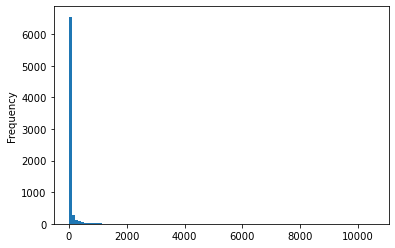

In [25]:
# create a historgram of arrests landmarks in groups of 100
arrests_landmarks.plot(kind='hist', bins=100)

In [26]:
# add a column to arrests dataset that contains a binary indicator 
# of whether the landmark includes the term 'non-specific'
arrests['non-specific'] = arrests[
    'apprehension_landmark'].str.contains(
    'non-specific', case=False, na=False).astype(int)

# create subset and calculate for each AOR 
# the number of non-specific occurences divided by the total number of arrests
# sort resulting proportions from largest to smallest
dub = arrests[['aor','id', 'non-specific']]
dub = dub.groupby('aor')['non-specific'].sum()/dub.groupby('aor')['id'].count()
dub.sort_values(ascending=False)

aor
LOS    0.572502
SNA    0.476560
NOL    0.331825
SPM    0.309558
WAS    0.307616
SFR    0.305085
ELP    0.301610
CHI    0.290704
DET    0.288306
SLC    0.232862
PHI    0.228163
MIA    0.218077
HOU    0.197634
HQ     0.195122
NYC    0.127210
BOS    0.117373
DAL    0.083006
ATL    0.077616
BUF    0.069478
NEW    0.061397
SND    0.051527
DEN    0.044400
BAL    0.007241
SEA    0.001569
PHO    0.000696
dtype: float64

## Top Ten Landmarks by AOR (aggregate)

In [27]:
# create subset of arrests by location
arrests_location = arrests.groupby(
    ['aor', 'apprehension_landmark'], as_index=False, dropna=False)['id'].count()

# create a subset of the ten largest landmarks in each AOR
arrests_aor_agg = arrests_location.sort_values(['aor', 'id'], ascending=False).groupby(
    'aor', dropna=False).head(10)

# create a list of AORs in the dataset, excluding NAN
fub = set(arrests['aor'])
fub.remove(np.nan)

# function that creates a plot of the top ten largest landmarks when given an AOR
def top_landmarks_aggregate(place):
    arrests_aor_agg.loc[arrests_aor_agg['aor'] == place].plot(
        y='id', x='apprehension_landmark', kind='barh').invert_yaxis()
    plt.title(place + " " + str(arrests.loc[arrests['aor'] == place]['id'].count()))
    return

In [28]:
# creates a plot that can select an AOR using a drop down widget
widgets.interact(top_landmarks_aggregate, place = fub)

interactive(children=(Dropdown(description='place', options=('SNA', 'PHI', 'NYC', 'SPM', 'SFR', 'ATL', 'SLC', …

<function __main__.top_landmarks_aggregate(place)>

## Top Ten Landmarks by AOR (proportions)

In [33]:
# create new column in subset of arrests by location 
# that is the sum of all arrests in that AOR
arrests_location['aor total'] = arrests_location.groupby(
    'aor', sort=False, dropna=False)["id"].transform('sum')

# create new column in subset of arrests by location that is the 
# proportion of arrests in a landmark divided by the total arrests in that AOR
arrests_location['aor proportion'] = arrests_location['id']/arrests_location['aor total']

# create a subset of the top ten most common landmarks in each AOR
arrests_aor_prop = arrests_location.sort_values(['aor', 'id'], ascending=False).groupby(
    'aor', dropna=False).head(10)

# function creates a plot of the proportion of the top ten largest landmarks in a given AOR
def top_landmarks_proportion(place):
    arrests_aor_prop.loc[arrests_aor_prop['aor'] == place].plot(
        y='aor proportion', x='apprehension_landmark', kind='barh').invert_yaxis()
    plt.title(place + " " + str(arrests.loc[arrests['aor'] == place]['id'].count()))
    return

In [34]:
widgets.interact(top_landmarks_proportion, place = fub)

interactive(children=(Dropdown(description='place', options=('SNA', 'PHI', 'NYC', 'SPM', 'SFR', 'ATL', 'SLC', …

<function __main__.top_landmarks_proportion(place)>

# Processing Disposition

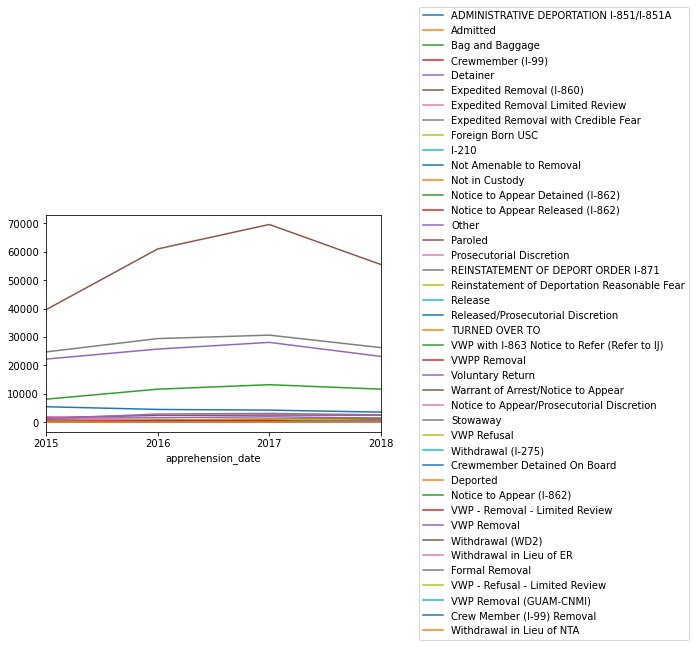

In [37]:
# create subset of encounters with date, processing disposition and ID
arrests_by_disposition = arrests[
    ["apprehension_date", "processing_disposition", "id"]]

# count the number of arrests by each type of processing disposition and date
arrests_by_disposition = arrests_by_disposition.groupby(
    ["processing_disposition", "apprehension_date"], 
    as_index=False, dropna=False)['id'].count()

# pivot df so that index is date and columns are processing disposition 
# (allows for easy groupby in next line of code)
arrests_by_disposition = arrests_by_disposition.pivot(
    index='apprehension_date', columns='processing_disposition', values='id')

# group by fiscal year
arrests_by_disposition = arrests_by_disposition.groupby(
    pd.Grouper(freq='AS-OCT'), dropna=False).sum()

# plot disposition types over time
arrests_by_disposition.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

In [36]:
# transpose table of transposed df to show disposition types over fiscal years
arrests_by_disposition.transpose().sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

apprehension_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
processing_disposition,,,,
Warrant of Arrest/Notice to Appear,"39,616","61,011","69,640","55,520"
REINSTATEMENT OF DEPORT ORDER I-871,"24,741","29,431","30,652","26,260"
Other,"22,211","25,736","28,101","23,148"
Bag and Baggage,"8,089","11,606","13,186","11,624"
ADMINISTRATIVE DEPORTATION I-851/I-851A,"5,425","4,474","4,234","3,531"
Voluntary Return,"1,219","2,851","3,061","2,572"
Expedited Removal (I-860),"1,635","2,347","2,491","2,467"
Detainer,"1,419","1,531","1,886","1,420"
Notice to Appear Released (I-862),689,703,"1,102","1,282"


# Citizenship

In [119]:
# create dataframe of arrests frequency by citizenship
arr_cit = arrests.citizenship.value_counts(normalize=True).to_frame()

# renames column header
arr_cit.columns = ["arrests"]

# converts column to percent
arr_cit = arr_cit*100
arr_cit = arr_cit.round(decimals=2)
arr_cit = arr_cit.sort_values(by = ['arrests'], ascending=False)
arr_cit = arr_cit.astype(str) + '%'

# displays results
arr_cit

,arrests
MEXICO,60.11%
GUATEMALA,10.66%
HONDURAS,8.39%
EL SALVADOR,6.36%
DOMINICAN REPUBLIC,1.37%
...,...
MAURITIUS,0.0%
QATAR,0.0%
FINLAND,0.0%
PAPUA NEW GUINEA,0.0%
